In [1]:
import matplotlib.pyplot as plt
from iso3166 import countries
import seaborn as sns
import pandas as pd
import datetime
import folium
import math

### Опис датасету
Датасет містить дані по 18-місячній активності 46,339 користувачів онлайн сервісу для ставок bwin.
Дані включають особисту інформацію про користувача(країну, стать, рік народження, дату реєстрації), а також дані про всі його ставки на протязі періоду(щоденні та загальні значення кількості ставок, виграшу та суми поставлених грошей)

In [2]:
world_filename = 'data/world-countries.json'
csv_filename2 = "data/PopTrendsBData2Live.csv"
df2 = pd.read_csv(csv_filename2)
csv_filename3 = "data/PopTrendsBData3Aggs.csv"
df3 = pd.read_csv(csv_filename3)

In [4]:
# 1
fix_live_df = df3[df3["StakeL"] != 0]
fix_live_df = fix_live_df[fix_live_df["StakeF"] != 0]
fix_live_df["ReturnPercentFixed"] = fix_live_df.apply(lambda row: row["WinF"]/row["StakeF"]*100, axis = 1)
fix_live_df["ReturnPercentLive"] = fix_live_df.apply(lambda row: row["WinL"]/row["StakeL"]*100, axis = 1)

In [14]:
# 2
def get_week(row):
    day = [int(x) for x in row["DateBet"].split('-')]
    return datetime.datetime(day[0], day[1], day[2]).weekday()
def get_week_number(row):
    day = [int(x) for x in row["DateBet"].split('-')]
    return str(day[0])+"-"+ str(datetime.date(day[0], day[1], day[2]).isocalendar()[1])

day_df = df2.groupby(["DateBet"]).mean().reset_index()
day_df['WeekDay'] =  day_df.apply(get_week, axis = 1)
day_df["ReturnSum"] = day_df.apply(lambda row: row["WinL"]/row["StakeL"]*100, axis = 1)
day_df["WeekNumber"] = day_df.apply(get_week_number, axis=1)

In [ ]:
# 3
birthyear_df = df3.groupby(["BirthYear"]).mean().reset_index()
birthyear_df = birthyear_df[birthyear_df["BirthYear"] > 1919]
birthyear_df = birthyear_df[birthyear_df["BetsA"] < 2000]
# TODO add age ( sub from 2008)
# df3 = df3[df3["Gender"] != 1] # 3749 # 46339

### 1. Який тип ставок вигідніший - з фіксованим коефіцієнтом чи "живі"?

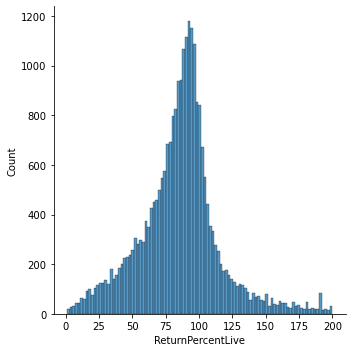

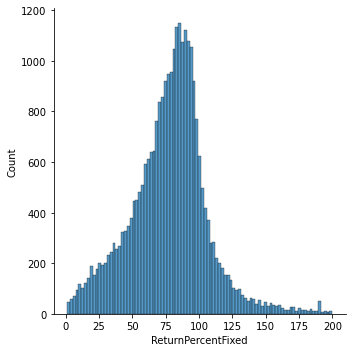

In [10]:
sns.displot(data=fix_live_df, x="ReturnPercentLive",binrange=(1,200))
sns.displot(data=fix_live_df, x="ReturnPercentFixed",binrange=(1,200))

### 2. Розподіл кількості ставок користувачів відповідно дня тижня

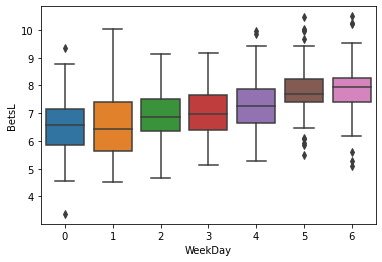

In [11]:
ax = sns.boxplot(x="WeekDay", y="BetsL", data=day_df)

### 3. Букмекерська активність залежно від статі та віку

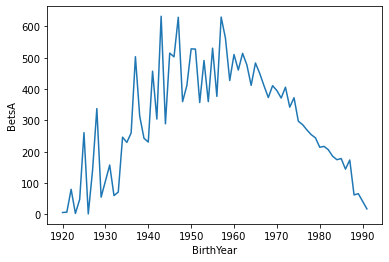

In [12]:
sns.lineplot(x=birthyear_df["BirthYear"], y=birthyear_df["BetsA"])
plt.show()